# 目录
### 数据质量分析
+ 缺失值
+ 异常值
+ 不一致的值
+ 重复数据
+ 含有特殊符号（#，￥，*）的数据
  
### 数据特征分析
+ 分布分析
    + 离散变量：条形图、饼图
    + 连续变量：直方图、密度图    
+ 对比分析（2组指标之间进行对比）
+ 统计量分析（集中趋势、离中趋势、其他统计函数）
+ 周期性分析（时序图）
+ 贡献度分析
+ 相关性分析

In [4]:
# -*- coding: utf-8 -*-  # 将脚本保存为utf-8格式
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 正常显示正负号

In [5]:
%matplotlib inline

### 数据质量分析
+ 缺失值
+ 异常值
+ 不一致的值
+ 重复数据
+ 含有特殊符号（#，￥，*）的数据

#### 缺失值分析
+ 缺失值产生的原因  
    +  信息无法获取(破坏性、太昂贵)    　　
    +  信息遗漏（人为原因）    
    +  信息属性缺失（未婚者配偶姓名）    
+ 缺失值的影响  
    +  丢失信息  
    +  模型不确定性增强  
    +  空置导致模型混乱，结果不可靠
+ 缺失值处理方法（具体处理详见数据预处理部分）
    +  删除存在缺失值的记录
    +  插补
    +  不处理

#### 异常值分析
+ 5数分析
+ 3sigma原则（所有数据都应该在3sigma之内）
+ 箱线图分析

In [6]:
data = pd.read_csv('C:/Users/asus/Documents/Python Scripts/implore/data.csv',index_col = u'PassengerId')# 设定PassengerId为索引列

In [7]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### 5数概括（仅对数量型变量生效）

In [8]:
data.describe() 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# 结合数据长度统计缺失值个数
data.shape

(891, 11)

##### 箱线图（仅对数量型变量生效）【可以对多列、单列都可以生效】

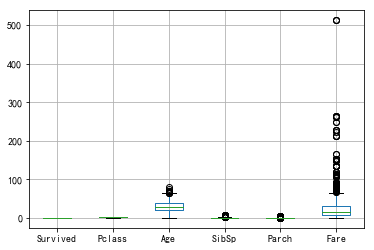

In [11]:
plt.figure()

p = data.boxplot()  #在没有    %matplotlib inline   时，需要plt.show()来显示图像

### 数据特征分析
+ 分布分析
    + 离散变量：条形图、饼图
    + 连续变量：直方图、密度图    
+ 对比分析（2组指标之间进行对比）
+ 统计量分析（集中趋势、离中趋势）
+ 周期性分析（时序图）
+ 贡献度分析
+ 相关性分析

#### 分布分析
+ 详见后文绘图部分

#### 统计量分析
+ 详见后文统计函数部分

#### 贡献度分析

In [129]:
# 生成数据
new_data = pd.Series(range(1,10))
new_data

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [131]:
# 数据排序
new_data2 = new_data.copy()
new_data2.sort_values(ascending = False,inplace=True)

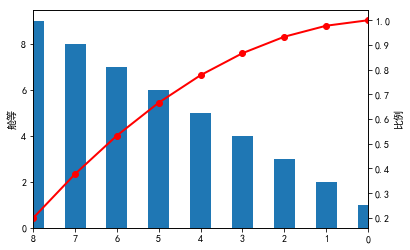

In [132]:
plt.figure()

new_data.plot(kind = 'bar')
plt.ylabel(u'舱等')   # 设置y轴标签
p = 1.0*new_data2.cumsum()/new_data2.sum()  # 计算累计占比
p.plot(color = 'r',secondary_y = True,style = '-o',linewidth = 2)   # 设置第二个坐标轴
plt.ylabel(u'比例')  # 设置第二坐标轴标签

plt.show()

#### 相关性分析

In [118]:
# 相关系数矩阵
data.corr() 

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [121]:
# 计算某一列与整个矩阵的相关系数
data.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [123]:
# 计算2列的相关系数
data['Survived'].corr(data['Age'])

-0.077221094572177643

### 统计函数
+ 可以是DataFrame、Series
##### 计算统计量
+ data.sum()
+ data.mean()
+ data.var()
+ data.std()
+ data.corr(method = 'pearson')
    + pearson  \   kendall   \   spearman
+ data.cov()
+ data.skew()
+ data.kurt()
+ data.describe()
##### 累计求统计量
+ data.cumsum()   累计求和
+ data.cumprod()    累计求积
+ data.cummax()   前1,2,3，...n个数据的最大值
+ data.cummin()   前1,2,3，...n个数据的最小值
##### 按列计算统计量
+ pd.rolling_sum(data,k)   按列计算数据的和,k指每k列计算一次均值
+ pd.rolling_mean(data,k)
+ pd.rolling_var(data,k)
+ pd.rolling_std(data,k)
+ pd.rolling_corr(data,k)
+ pd.rolling_cov(data,k)
+ pd.rolling_skew(data,k)
+ pd.rolling_kurt(data,k)

In [125]:
data.sum()

Survived      342.0000
Pclass       2057.0000
Age         21205.1700
SibSp         466.0000
Parch         340.0000
Fare        28693.9493
dtype: float64

In [128]:
data['Survived'].mean()

0.3838383838383838

### 绘图

+ 一维图（直方图）
    + plt.hist(x,k)
        + k为参数
    + plt.pie(size)
        + size表明每一个区域占比  

(array([   8.,   23.,   89.,  177.,  274.,  229.,  126.,   58.,   14.,    2.]),
 array([-3.18841848, -2.51797937, -1.84754027, -1.17710117, -0.50666207,
         0.16377703,  0.83421613,  1.50465523,  2.17509434,  2.84553344,
         3.51597254]),
 <a list of 10 Patch objects>)

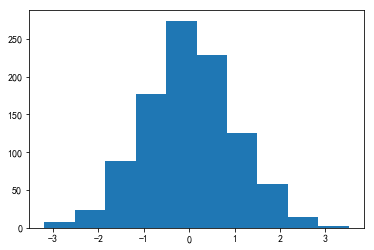

In [140]:
x = np.random.randn(1000)
plt.hist(x,10)

(-1.210028811752033,
 1.1361729886364198,
 -1.1570998009357523,
 1.1027190381397978)

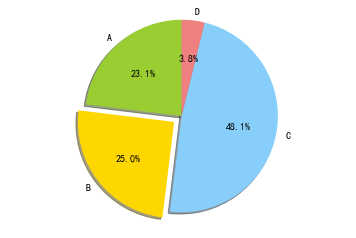

In [143]:
labels = 'A','B','C','D'
size = [12,13,25,2]
colors = ['yellowgreen','gold','lightskyblue','lightcoral'] 
explode = (0,0.1,0,0) # 突出显示第二块

plt.pie(size,explode = explode,labels = labels,colors = colors,autopct = '%1.1f%%',shadow = True,startangle = 90)
plt.axis('equal')

+ 二维图（折线图）
    + plt.plot(x,y,S)
        + S的选择：图示类型、样式、yanse
        + 样式：o、+、-、--
        + 颜色：b、r、g

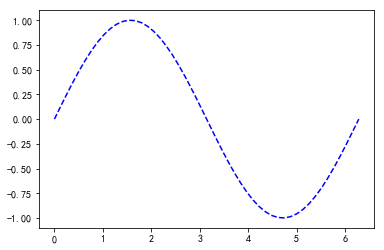

In [137]:
x = np.linspace(0,2*np.pi,50)
y = np.sin(x)

plt.plot(x,y,'b--')

+ DataFranem 和 Series内置的作图方法(index为横坐标、每列数据为纵坐标自动作图)
    + D.plot(kind = ''，S)
    + kind:line、bar、barh（条形图）、hist、box、kde（密度图）、area、pie
    + S：与plt.plot()中的S一致
    + 
    + D.plot(logx = True)/D.plot(logy = True)  对某坐标轴使用对数刻度
    + D.plot(yerr = error)/D.plot(xerr = error)  在x、y轴方向绘制误差棒图

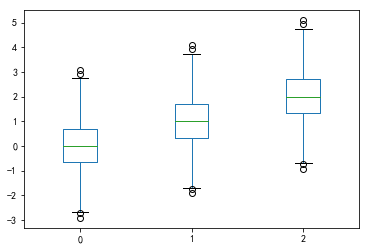

In [145]:
x = np.random.randn(1000)
D = pd.DataFrame([x,x+1,x+2]).T
D.plot(kind = 'box')

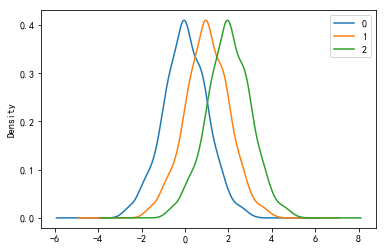

In [150]:
D.plot(kind = 'kde')

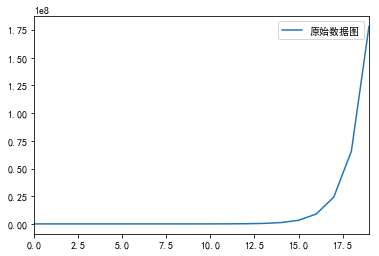

In [154]:
x = pd.Series(np.exp(np.arange(20)))
x.plot(label = u'原始数据图',legend = True)

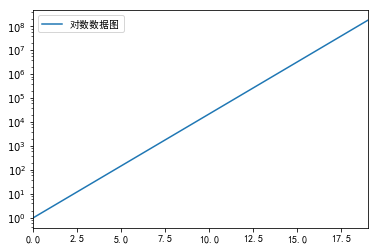

In [155]:
x.plot(logy = True,label = u'对数数据图',legend = True)

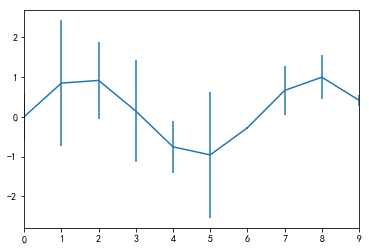

In [156]:
error = np.random.randn(10)  # 误差数据列
y = pd.Series(np.sin(np.arange(10)))  # 均值数据列
y.plot(yerr =error) # 绘制误差图